# Лабораторная работа 3.01
## Отчет подготовил: Ярощук Владислав Викторович, M3208

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import polyfit, polyval
import sympy

In [2]:
# Константы
const_d_X = 1e-3
const_d_Y = 0.5e-3
const_d_Fi = 0.1

In [3]:
# Функция вычисления среднего значения напряженности между эквипотенциальными поверхностями
def getMeanE(fi1, fi2, distance):
    return (fi1 - fi2) / distance;

In [4]:
# Функция вычисления поверхностной плотности зарядов:
def getSigma(dFi, dL):
    e0 = 8.85e-12 # электрическая постоянная, Ф/м
    return -e0 * dFi / dL

In [5]:
# Расчет погрешностей:
# Формула вычисления абсолютной погрешности:
Fi1, Fi2, L, d_Fi1, d_Fi2, d_L = sympy.symbols('Fi1 Fi2 L dFi1 dFi2 dL')
E = (Fi1 - Fi2) / L

E_d_Fi1 = sympy.diff(E, Fi1)
E_d_Fi2 = sympy.diff(E, Fi2)
E_d_L = sympy.diff(E, L)

d_E_calc = sympy.sqrt((d_Fi1*E_d_Fi1)**2 + (d_Fi2*E_d_Fi2)**2 + (d_L*E_d_L)**2)
d_E_calc

sqrt(dFi1**2/L**2 + dFi2**2/L**2 + dL**2*(Fi1 - Fi2)**2/L**4)

In [6]:
# Формула вычисления относительной погрешности:
eps_E_calc = d_E_calc / E * 100
eps_E_calc

100*L*sqrt(dFi1**2/L**2 + dFi2**2/L**2 + dL**2*(Fi1 - Fi2)**2/L**4)/(Fi1 - Fi2)

In [7]:

# Часть 1.1: плоский конденсатор - расчет значения напряженности в центре ванны
# Используем значение между эквипотенциальными поверхностями 6В и 8В
# Расстояния между парами точек поверхностей:
dists = pd.array([4.1, 3.9, 3.7, 3.9, 4,2])
dists *= 1e-2

# Значение потенциалов, В
fi_first = 8;
fi_second = 6;

mean_dist = dists.mean()
mean_e = getMeanE(fi_first, fi_second, mean_dist)

formulas_args = [
    (Fi1, fi_first), 
    (Fi2, fi_second), 
    (L, mean_dist), 
    (d_Fi1, const_d_Fi), 
    (d_Fi2, const_d_Fi), 
    (d_L, const_d_X)
]
dE = d_E_calc.subs(formulas_args)
epsE = eps_E_calc.subs(formulas_args)

print("Среднее расстояние, м: ", mean_dist)
print("Среднее значение напряженности в центре ванны, В/м: ", mean_e)
print("Абсолютная погрешность, В/м: ", dE)
print("Относительная погрешность, %: ", epsE)

Среднее расстояние, м:  0.036
Среднее значение напряженности в центре ванны, В/м:  55.55555555555556
Абсолютная погрешность, В/м:  4.22061553431400
Относительная погрешность, %:  7.59710796176519


In [8]:
# Часть 1.2: плоский конденсатор - расчет значения напряженности в окрестности одного из электродов
# Используем значение между эквипотенциальными поверхностями 0В и 0,5В
# Расстояния между парами точек поверхностей:
dists = pd.array([0.35, 0.6, 0.65, 0.6, 0.2])
dists *= 1e-2

# Значение потенциалов, В
fi_first = 0.5;
fi_second = 0;

mean_dist = dists.mean()
mean_e = getMeanE(fi_first, fi_second, mean_dist)

formulas_args = [
    (Fi1, fi_first), 
    (Fi2, fi_second), 
    (L, mean_dist), 
    (d_Fi1, const_d_Fi), 
    (d_Fi2, const_d_Fi), 
    (d_L, const_d_X)
]
dE = d_E_calc.subs(formulas_args)
epsE = eps_E_calc.subs(formulas_args)

print("Среднее расстояние, м: ", mean_dist)
print("Среднее значение напряженности в окрестности электрода, В/м: ", mean_e)
print("Абсолютная погрешность, В/м: ", dE)
print("Относительная погрешность, %: ", epsE)

Среднее расстояние, м:  0.0048000000000000004
Среднее значение напряженности в окрестности электрода, В/м:  104.16666666666666
Абсолютная погрешность, В/м:  36.5924286603437
Относительная погрешность, %:  35.1287315139300


In [9]:
# Часть 1.2: плоский конденсатор - оценка поверхностной плотности зарядов на электродах
# Для левого электрода
dists = pd.array([0.35, 0.6, 0.65, 0.6, 0.2])
dFi = 0.5
print("Поверхностная плотность заряда для левого электрода, Кл/м^2: ", getSigma(-dFi, dists.mean()))

# Для правого элекитрода
dists = pd.array([0.2, 0.6, 0.7, 0.65, 0.2])
dFi = 0.5
print("Поверхностная плотность заряда для правого электрода, Кл/м^2: ", getSigma(dFi, dists.mean()))

Поверхностная плотность заряда для левого электрода, Кл/м^2:  9.218749999999999e-12
Поверхностная плотность заряда для правого электрода, Кл/м^2:  -9.414893617021277e-12


In [10]:
# Часть 2.1: металлическое кольцо в электрическом поле - области с минимальной и максимальной напряженностью

# Области минимальной напряженности соответвует самая протяженная, максимальной - самая короткая
# линия напряженности при измерении между эквипотенциальными поверхностями
distanceEMin = 4e-2 # Расстояние для Emin
distanceEMax = 5e-3 # Расстояние для Emax
fi_first = 7
fi_second = 6
print("Emin, В/м: ", getMeanE(fi_first, fi_second, distanceEMin))
print("Emax, В/м: ", getMeanE(fi_first, fi_second, distanceEMax))

Emin, В/м:  25.0
Emax, В/м:  200.0


In [11]:
# Часть 3: графики зависимости потенциала от координаты для горизонтали Y=10
# Исходные данные
fiX_df = pd.DataFrame({'fi': [2, 4, 6, 7, 8, 10, 12],
                       'xPlane' : [4.2, 7, 13.2, 15, 17, 21, 25.2],
                       'xRing' : [2.7, 5.8, 8.2, 15, 21.8, 24.2, 27.6]})
fiX_df['xPlane'] *= 1e-2
fiX_df['xRing'] *= 1e-2
fiX_df

,fi,xPlane,xRing
0,2,0.042,0.027
1,4,0.070,0.058
2,6,0.132,0.082
3,7,0.150,0.150
4,8,0.170,0.218
5,10,0.210,0.242
6,12,0.252,0.276


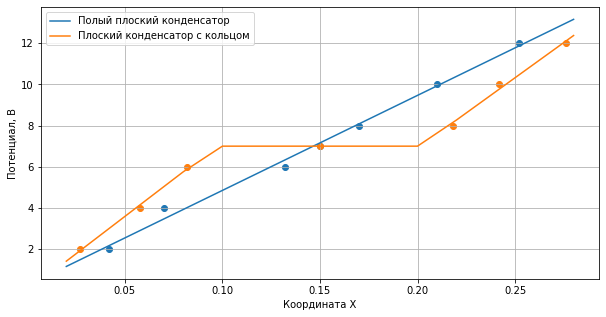

In [12]:
# Строим графики
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Координата X")
ax.set_ylabel("Потенциал, В")

x = np.arange(0.02, 0.29, 0.02)

ax.grid(True)
ax.scatter(fiX_df['xPlane'], fiX_df['fi'])
k1, k = polyfit(fiX_df['xPlane'], fiX_df['fi'], 1)
ax.plot(x, polyval([k1, k], x), label='Полый плоский конденсатор')

ax.scatter(fiX_df['xRing'], fiX_df['fi'])
def FiRing(x):
    if (x < 0.09):
        k1, k = polyfit(fiX_df['xRing'][:3], fiX_df['fi'][:3], 1)
        return polyval([k1, k], x)
    elif (x > 0.21):
        k1, k = polyfit(fiX_df['xRing'][4:], fiX_df['fi'][4:], 1)
        return polyval([k1, k], x)
    else:
        return 7
    
ax.plot(x, np.vectorize(FiRing)(x), label='Плоский конденсатор с кольцом')
ax.legend()

### Вывод
Мы провели построение сечений эквипотенциальных поверхностей и силовых линий электростатического поля на основе экспериментального моделирования распределения потенциала в слабопроводящей среде. Провели расчет значений напряженности в различных точках плоскости. Для модели с кольцом внутри плоского конденсатора установили местоположение областей максимальной и минимальной напряженности, расчитали значения напряженности для данных областей. Расчитали значение плотности заряда для электрода. Также, мы установили функциональную зависимость потенциала от горизонтальной координаты при перемещеннии между электродами, для модели с кольцом убедились в прерывистом поведении функции: потенциал на конце и внутри одинаков, так как оно обладает высокой электропроводностью.